In [242]:
import numpy as np
import sympy as sym
from tqdm import tqdm
import matplotlib.pyplot as plt

In [243]:
def Laguerre(n):
    x = sym.symbols('x')
    f= (x**n)* sym.exp(-x)
    L=((sym.exp(x))/(np.math.factorial(n)))*f.diff(x, n)
    L=sym.expand(L)
    return L

In [244]:
def Derivada(f,x,h=0.0001):        
    return (f(x+h)-f(x-h))/(2*h)

In [245]:
def GetWeight(f,xk,n):
    return xk/( ((n+1)*(f(xk)))**2 )

In [246]:
def Newton(f,df,xn,error,it,preci=0.001,ite=1000):
    
    h_ = 1.0e-4
    
    while error > preci and it < ite:
        
        try:
            
            xn1 = xn - f(xn)/df(f,xn,h_)+1.0e-10
            error = np.abs((xn1-xn)/xn1)        
            
        except ZeroDivisionError:
            print("No se peude")
            
        xn = xn1
        it += 1
    
   
    if it == ite:
        return False
    else:
        return xn1

In [247]:
def raices(f,df, X, precision=0.001, tole=5):
    
    raiz = np.array([])
    
    for i in X:
        
        root = Newton(f,df,i,100,0,preci=precision)
        
        if root != False:
            if round(root,tole) not in Roots:
                raiz=np.append(raiz,round(root,tole))
            
      
    return raiz

In [248]:
def Leggauss(n):
    
    if n == 0 or n == 1:
        return 0,0
    
    Laguerre = np.array([])
    Laguerre_1 = np.array([])
    Weights = np.array([])
    
    x = sym.Symbol('x', real=True)  
    
    for i in range(0,n+1):
        
        p = Laguerre(i)
        p_1 = Laguerre(i+1)
        Laguerre=np.append(Laguerre, p)
        Laguerre_1=np.append(Laguerre_1, p_1)
    
   
    xi = np.linspace(0.,100,2000)
    
    pn = sym.lambdify([x], Laguerre[n],'numpy')
    pn1 = sym.lambdify([x], Laguerre_1[n],'numpy')

    Roots = raices(pn,Derivada, xi, 0.0000001,tolerancia=7)
    Roots.sort()
    
    
    for j in Roots:
        Weights.append(round(GetWeight(pn1,j,n),7))
        
    Roots = np.array(Roots)
    Weights = np.array(Weights)
        
    return Roots, Weights


In [249]:

Ie = np.pi**4/15.

f = lambda x : x**3/(1-np.exp(-x))
Integral = sum( weights*f(roots) )
print(Integral)

6.481140690585725


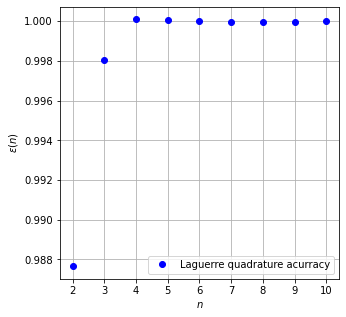

In [250]:
fig = plt.figure(figsize=(5,5))
plt.plot(Npoints,Error,'bo', label='Laguerre quadrature acurracy')
plt.xlabel(r'$n$')
plt.ylabel(r'$\epsilon(n)$')
plt.grid()
plt.legend(loc=0)
plt.savefig('Laguerre.pdf')
plt.show()
